In [19]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configuração da máquina (MacBook Pro M3 2023)

* Quantidade total de núcleos: 12
* Quantidade total de threads: 12



# Informações sobre os dados na tabela

* Quantidade de threads (Em que 0 signfica sequencial)
* Dimensões das matrizes
* Tempo de inicialização
* Tempo de processamento (apenas multiplicação de matriz)
* Tempo de finalização



In [20]:
# Carrega o arquivo com tempos de execução
nomes_das_colunas = ['Quantidade de Processos', 'Quantidade de Pontos', "Tempo de Processamento"]
df = pd.read_csv("./log_execucao_kmeans_2_clusters_4_cols.csv", header=None, names=nomes_das_colunas)
df

,Quantidade de Processos,Quantidade de Pontos,Tempo de Processamento
0,0,500,0.01086
1,0,500,0.01112
2,0,500,0.01174
3,0,500,0.01120
4,0,500,0.01670
...,...,...,...
95,8,100000,15.34602
96,8,100000,15.26525
97,8,100000,15.48278
98,8,100000,15.34039


# Médias dos tempos de execução(em segundos) para os processos e as quantidades de pontos
### OBS.: Quantidade de threads 0 faz referencia ao sequencial

In [21]:
df_medias = df.groupby(["Quantidade de Processos", "Quantidade de Pontos"]).median()
df_medias

Tempo de Processamento
Quantidade de Processos Quantidade de Pontos                        
0                       500                                  0.01120
                        1000                                 0.02434
                        10000                                0.33017
                        100000                               4.43291
1                       500                                  0.31197
                        1000                                 0.33962
                        10000                                0.87100
                        100000                               7.75519
2                       500                                  0.32471
                        1000                                 0.33944
                        10000                                0.63753
                        100000                               4.50572
4                       500                                  0.37076
                        1000                                 0.41488
                        10000                                1.42786
                        100000                              14.79501
8                       500                                  0.47368
                        1000                                 0.48268
                        10000                                1.51222
                        100000                              15.34602

# Graficos

### Aceleração

In [22]:
# Função para calcular a aceleração
def calc_aceleracao(row):
    dim = row.name[1]
    return df_medias.loc[0, dim]["Tempo de Processamento"] / row["Tempo de Processamento"]

# Aplicar a função de aceleração para todas as combinações de Threads e Dim (exceto sequencial)
df_medias['Aceleracao'] = df_medias.apply(calc_aceleracao, axis=1)

In [23]:
df_medias

Tempo de Processamento  \
Quantidade de Processos Quantidade de Pontos                           
0                       500                                  0.01120   
                        1000                                 0.02434   
                        10000                                0.33017   
                        100000                               4.43291   
1                       500                                  0.31197   
                        1000                                 0.33962   
                        10000                                0.87100   
                        100000                               7.75519   
2                       500                                  0.32471   
                        1000                                 0.33944   
                        10000                                0.63753   
                        100000                               4.50572   
4                       500                                  0.37076   
                        1000                                 0.41488   
                        10000                                1.42786   
                        100000                              14.79501   
8                       500                                  0.47368   
                        1000                                 0.48268   
                        10000                                1.51222   
                        100000                              15.34602   

                                              Aceleracao  
Quantidade de Processos Quantidade de Pontos              
0                       500                     1.000000  
                        1000                    1.000000  
                        10000                   1.000000  
                        100000                  1.000000  
1                       500                     0.035901  
                        1000                    0.071668  
                        10000                   0.379070  
                        100000                  0.571606  
2                       500                     0.034492  
                        1000                    0.071706  
                        10000                   0.517889  
                        100000                  0.983841  
4                       500                     0.030208  
                        1000                    0.058668  
                        10000                   0.231234  
                        100000                  0.299622  
8                       500                     0.023645  
                        1000                    0.050427  
                        10000                   0.218335  
                        100000                  0.288864

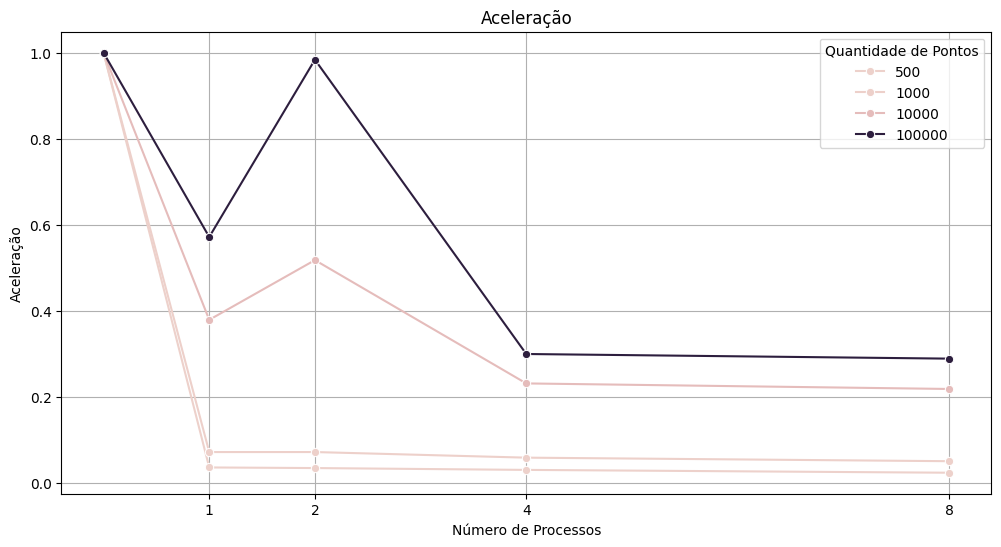

In [24]:
# Criar o gráfico de linhas
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_medias, x='Quantidade de Processos', y='Aceleracao', hue='Quantidade de Pontos', marker='o')

# Configurações do gráfico
plt.title('Aceleração')
plt.xlabel('Número de Processos')
plt.ylabel('Aceleração')
plt.grid(True)
plt.xticks([1, 2, 4, 8])
plt.show()

### Eficiência

In [25]:
# Função para calcular a eficiência
def calc_efic(row):
    th = row.name[0]
    if th == 0:
        return 1
    return row["Aceleracao"] / th

In [26]:
# Aplicar a função de eficiência
df_medias['Eficiencia'] = df_medias.apply(calc_efic, axis=1)

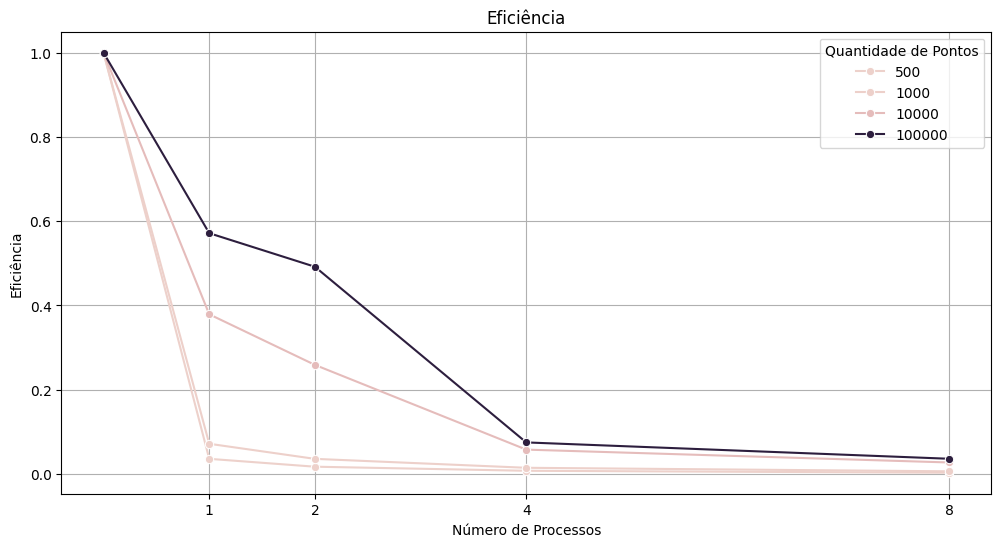

In [27]:
# Criar o gráfico de linhas com o Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_medias, x='Quantidade de Processos', y='Eficiencia', hue='Quantidade de Pontos', marker='o')

# Configurações do gráfico
plt.title('Eficiência')
plt.xlabel('Número de Processos')
plt.ylabel('Eficiência')
plt.grid(True)
plt.xticks([1, 2, 4, 8])
plt.show()